In [14]:
from ipynb.fs.full.GNC import *
from ipynb.fs.full.Draw import *
from ipynb.fs.full.GNCquick import *

In [15]:
###################################################################
#bc approx on fb food
edges = []
nodes = set()
with open('C:/Users/pc/Desktop/thesis/data/dataFoodFb/data.nodes', newline = '', encoding= 'utf-8') as data:                                                                                          
    reader = csv.reader(data, delimiter=',')
    for datum in data:
        datum = datum.split(",")
        index = len(datum) - 1
        datum[index] = datum[index].replace("\n", "")
        nodes.add(datum[index])
with open('C:/Users/pc/Desktop/thesis/data/dataFoodFb/data.edges', newline = '', encoding= 'utf-8') as data:                                                                                          
    reader = csv.reader(data, delimiter=',')
    for datum in data:
        datum = datum.split(",")
        datum[1] = datum[1].replace("\n", "")
        edges.append([datum[0], datum[1]])
network = nx.Graph()
network.add_nodes_from(nodes)
network.add_edges_from(edges)

In [9]:
###################################################################
#revised on lastfm dataset
start_time1 = time.time()
for i in range(1):
    result = revised_girvan(network)
communities = next(result)
print(str((time.time() - start_time1)) + " seconds")

0.23736572265625 seconds


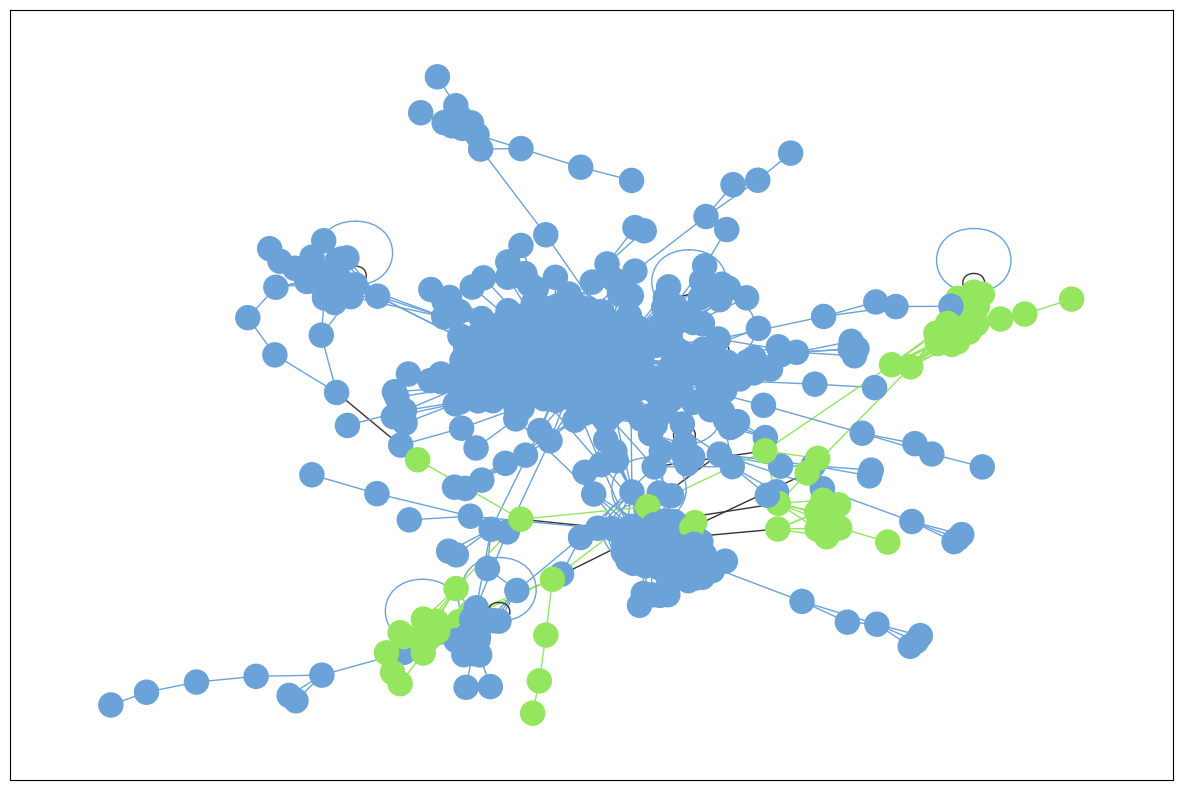

In [10]:
draw_community(network, communities)

In [11]:
###################################################################
#revised quick on lastfm dataset
start_time1 = time.time()
for i in range(1):
    result = revised_girvan_quick(network)
communities = next(result)
print(str((time.time() - start_time1)) + " seconds")

0.10175609588623047 seconds


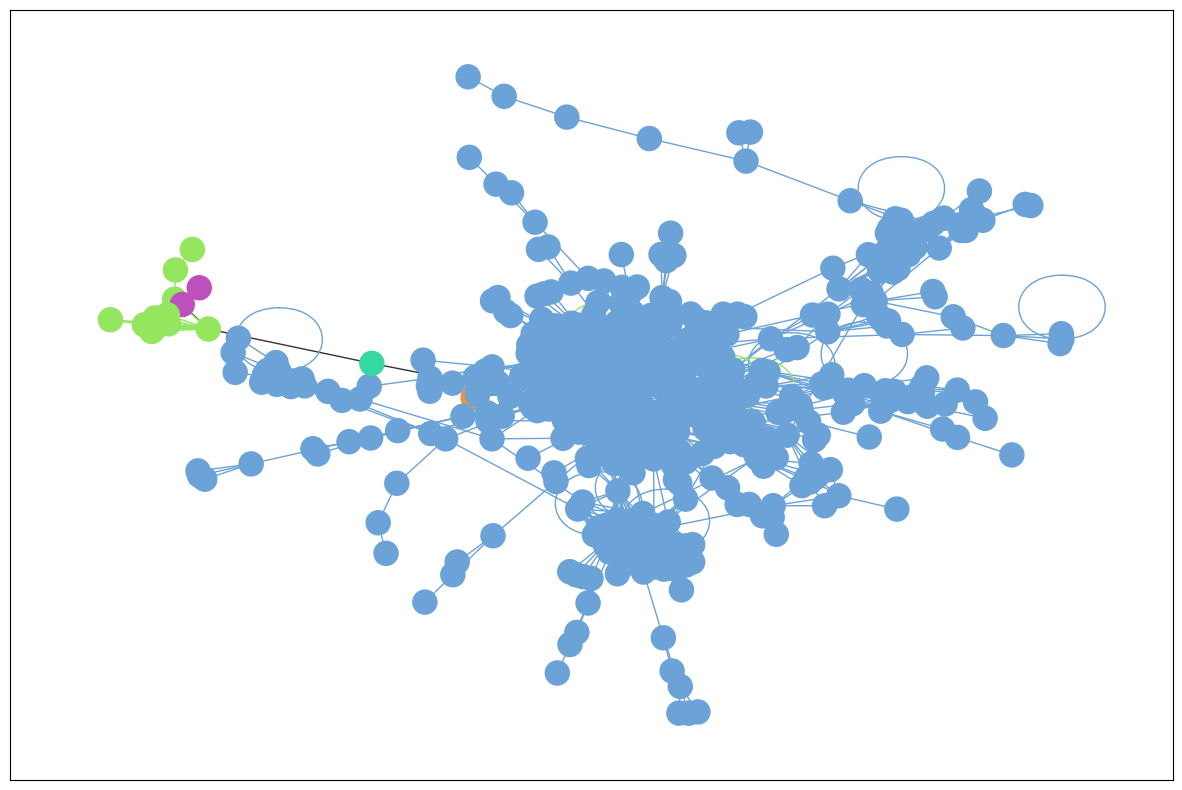

In [12]:
draw_community(network, communities)

In [16]:
##girvan revised on fb food
start_time1 = time.time()
result = revised_girvan(network)
for i in range(1):
    communities = next(result)
print(str((time.time() - start_time1)) + "seconds")

0.3021888732910156seconds


In [17]:
##girvan revised on fb food
start_time2 = time.time()
result2 = nxcom.girvan_newman(network)
for i in range(1):
    communities2 = next(result2)
print(str((time.time() - start_time2)) + "seconds")

16.62774133682251seconds


In [19]:
#########
#checking quality by comparing girvan output with revised girvan by 2 communities
import difflib

sm=difflib.SequenceMatcher(None,list(communities[0]),list(communities2[0]))
ratio1 = sm.ratio()
print(ratio1)

sm=difflib.SequenceMatcher(None,list(communities[1]),list(communities2[1]))
ratio2 = sm.ratio()
print(ratio2)
(ratio1+ratio2)/2

0.9085820895522388
0.16666666666666666


0.5376243781094527